In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
df = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 다항회귀

 **관계의 형태**에 초점을 맞춘 모델
 
- 정의: 독립변수의 **거듭제곱($X^2, X^3, \dots$)**을 사용하여 종속변수와의 관계를 **곡선 형태**로 표현하는 모델
- 특징: 수식 자체에는 $X^2$ 항이 들어가 비선형 관계를 모델링하지만, 회귀 계수($\beta_0, \beta_1, \beta_2$)의 관점에서는 여전히 선형이기 때문에 선형 모델의 한 종류로 간주
- 시각화: 2차원 공간에서 데이터를 예측하는 곡선 형태

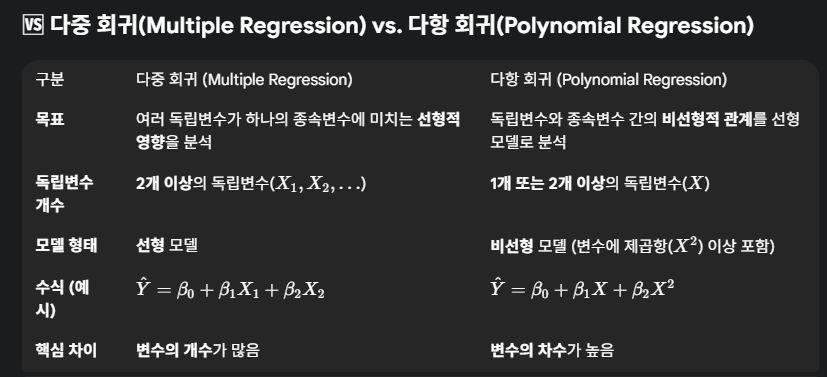

요약
- 다중 회귀는 $\text{사과} + \text{바나나}$처럼 **여러 개의 과일(변수)**을 다룸
- 다항 회귀는 $\text{사과} + \text{사과}^2$처럼 하나의 과일(변수)을 껍질까지 까서(거듭제곱) 더 자세히 다룸
- 이 두 가지는 결합 가능 &nbsp;&nbsp;&nbsp; Ex) $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1^2$ 와 같은 모델은 **다중 다항 회귀(Multiple Polynomial Regression)

## 변수 선택
* 3가지 독립변수 모두 선택

In [3]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [4]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 다항변환

**PolynomialFeatures**
- scikit-learn 라이브러리에서 제공하는 클래스로, 주어진 특성들의 다항식 조합을 생성
- 원본 특정들의 조합을 통해 새로운 특성을 생성

    - 입력 [a, b]가 주어졌을 때 degree=2 인 경우 [1, a, b, a^2, ab, b^2]을 생성
- 특성의 수가 크게 증가하여 과적합의 위험이 있을 수도 있음
- 다항식 특성은 원본 특성의 거듭제곱을 포함하므로, 특성 스케일링이 중요할 수 있음

In [5]:
from sklearn.preprocessing import PolynomialFeatures
ploy = PolynomialFeatures(degree=2, include_bias=False)     # 절편 역할의 상수항 False
X_train_ploy = ploy.fit_transform(X_train)
X_test_ploy = ploy.fit_transform(X_test)

X_train_ploy.shape

(150, 9)

**1. 원래 데이터의 차원**
- 원래 데이터 ($X\_\text{train}$.shape): $(150, 3)$
- 관측치 수: 150개
- 독립변수(특성) 수: 3개 (예: $X_1, X_2, X_3$)

**2. 다항 변환 ($degree=2$, include_bias=False)**
- PolynomialFeatures(degree=2)를 적용하면, 기존의 3개 변수($X_1, X_2, X_3$)로부터 9개의 특성($p=9$)이 생성

    | 생성된 특성 형태 | 차수 | 개수 | 비고 |
    | :--- | :--- | :--- | :--- |
    | **원래 변수** | 1차항 | 3개 | $X_1, X_2, X_3$ |
    | **제곱항** | 2차항 | 3개 | $X_1^2, X_2^2, X_3^2$ |
    | **교호작용항** | 2차항 | 3개 | $X_1 X_2, X_1 X_3, X_2 X_3$ |
    | **총 특성 수** | - | **9개** | $3 + 3 + 3 = 9$ |

**3. 총 특성 수 계산 공식**
$$\text{총 특성 수} = \binom{p+d}{d} - 1$$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 이 경우 $p=3$ (변수 개수), $d=2$ (차수)이므로: 
$$\text{총 특성 수} = \binom{3+2}{2} - 1 = \binom{5}{2} - 1$$
$$\binom{5}{2} = \frac{5 \times 4}{2 \times 1} = 10$$
$$10 - 1 = \mathbf{9}$$

<Axes: >

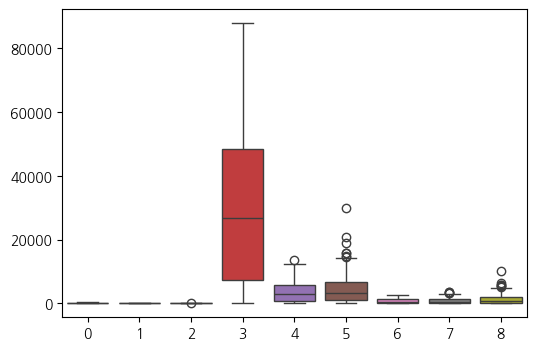

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(X_train_ploy)

## 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ploy_scaled = scaler.fit_transform(X_train_ploy)
X_test_ploy_scaled = scaler.transform(X_test_ploy)

<Axes: >

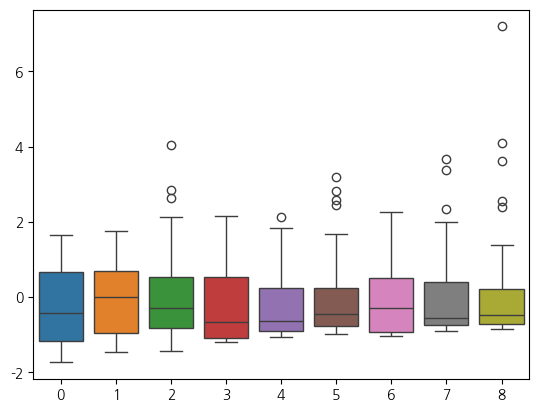

In [8]:
sns.boxplot(X_test_ploy_scaled)

## 모델 생성 및 훈련

In [9]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train_ploy_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# 다항 회귀 모델의 훈련 세트에 대한 성능 점수 (회귀 모델의 성능을 평가, 결정계수 R^2값)
model.score(X_train_ploy_scaled, y_train)

0.9276607239475623

-> 모델이 학습에 사용했던 훈련 데이터에 대해서, 모델이 얼마나 잘 예측하고 있는지($R^2$)

## 평가

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model.predict(X_test_ploy_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===다항회귀 모델의 평가결과===')
print(f'R2:{r2:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')

===다항회귀 모델의 평가결과===
R2:0.95
RMSE:1.18
MAE:0.90
MSE:1.40


In [12]:
# 다항 회귀 모델의 훈련 세트에 대한 성능 점수 (회귀 모델의 성능을 평가, 결정계수 R^2값)
model.score(X_train_ploy_scaled, y_train)

0.9276607239475623

In [13]:
# 다항 회귀 모델의 테스트 세트에 대한 성능 점수 (모델의 실제 일반화 성능을 확인)
model.score(X_test_ploy_scaled, y_test)

0.9485618659991291

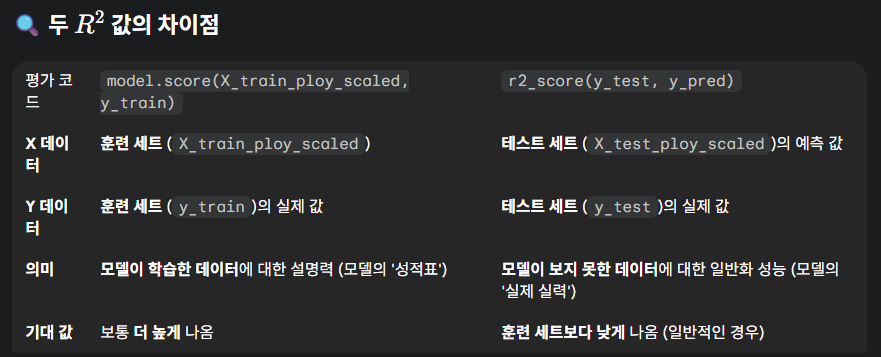

## Ridge

규제 
- 모델의 과적합을 방지하고 일반화 성능을 향상시키기 위해 사용되는 기법
- 모델의 복잡도를 제어하여 과적합을 방지

    - 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하여 과적합을 방지
- 계수(가중치)에 패널티를 부여하는 방식으로 작동

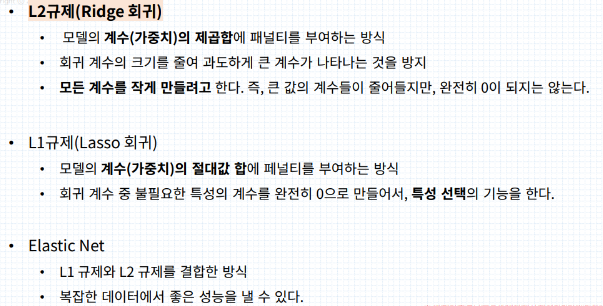

In [14]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train_ploy_scaled, y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


**alpha=10의 역할**
- $\alpha$ 값의 크기: $\alpha$ 값은 규제의 강도를 나타냄
- alpha=10의 의미: 모델의 손실 함수에 비교적 강한 규제를 적용하겠다는 의미

    $\alpha$가 커지면 규제 항의 영향력이 커져서 회귀 계수($\beta$)들이 더 0에 가깝게 줄어들게 됨  
    $\alpha$가 0에 가까우면 규제가 약해져 일반적인 선형 회귀(OLS)와 유사해짐  
    $\alpha$가 무한대에 가까우면 계수들이 모두 0이 되어 아무것도 예측하지 못하게 됨 

    **교차 검증(Cross-Validation)**을 통해 가장 좋은 성능을 내는 $\alpha$를 찾아야 함

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
pred = model_ridge.predict(X_test_ploy_scaled)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('===릿지 모델의 평가결과===')
print(f'R2:{r2:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MSE:{mse:.2f}')

===릿지 모델의 평가결과===
R2:0.92
RMSE:1.45
MAE:1.07
MSE:2.10


**L2 규제를 적용하는 목적**
- 모델의 **예측 정확도(Accuracy)**를 높이는 것이 아니라, 과적합(Overfitting)을 방지하여 모델의 안정성과 일반화 능력을 확보하는 것

L2 규제(alpha=10)는 모델의 회귀 계수(weights)를 강제로 0에 가깝게 줄여 모델을 단순화
- 결과: 모델이 훈련 데이터의 **잡음(Noise)**이나 극단적인 패턴을 외우는 것을 방지
- 직접적인 영향: 규제가 강해지면 모델의 복잡도가 줄어들기 때문에, 데이터를 설명하는 능력($R^2$)은 필연적으로 약간 감소  
즉, 성능을 크게 잃지 않으면서 모델의 안정성을 높였다고 평가할 수 있음 (0.95 -> 0.92)

대부분의 경우, 규제를 통해 약간의 $R^2$ 하락을 감수하고 더 안정적이고 일반화 능력이 좋은 모델을 얻는 것을 목표로 함